In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-eight/Data.xlsx


In [60]:
# Block 1: Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re

# Define a custom list of stopwords (words to exclude)
stop_words = {
    'the', 'and', 'to', 'of', 'a', 'in', 'for', 'on', 'at', 'with', 'this', 'it', 
    'by', 'an', 'is', 'was', 'that', 'not', 'from', 'as', 'we', 'be', 'have', 'or', 
    'are', 'but', 'will', 'has', 'need', 'needs', "didn't", 'way', 'games', 'game', "don't", 'did',
'me','so','u','would','were','than','dont','them','if','they','its','which','where','wasnt','their',
'there','can','didnt','i','when','what','our','should','some','only','had','you','like','do'}

# Block 2: Load the data
file_path = "/kaggle/input/data-eight/Data.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Display the first few rows to understand the data structure
df.head()


,Reviews,Category
0,Arena club food buffet has really stepped up a...,Concessions
1,Arena Club staff catering staff very helpful,Concessions
2,Have never used.,Concessions
3,Stm meals have been great this year. Please br...,Concessions
4,We do not buy from the concession.,Concessions


In [61]:
# Block 3: Clean the text data
def clean_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

# Apply text cleaning to the 'Reviews' column
df['cleaned_reviews'] = df['Reviews'].apply(clean_text)

# Display the first few cleaned reviews
df[['Reviews', 'cleaned_reviews']].head()


,Reviews,cleaned_reviews
0,Arena club food buffet has really stepped up a...,arena club food buffet has really stepped up a...
1,Arena Club staff catering staff very helpful,arena club staff catering staff very helpful
2,Have never used.,have never used
3,Stm meals have been great this year. Please br...,stm meals have been great this year please bri...
4,We do not buy from the concession.,we do not buy from the concession


In [62]:
# Block 4: Tokenize text and calculate word frequency, excluding specific words
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(df['cleaned_reviews'])
word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), word_matrix.sum(axis=0).A1)))

# Filter out unwanted words from the word counts
filtered_word_counts = Counter({word: count for word, count in word_counts.items() if word not in exclude_words})

# Display the 10 most common words after filtering
print("Most Common Words (Filtered):", filtered_word_counts.most_common(10))


Most Common Words (Filtered): [('parking', 74), ('prices', 72), ('food', 56), ('stadium', 53), ('ticket', 53), ('great', 48), ('water', 48), ('club', 46), ('high', 45), ('tickets', 45)]


In [64]:
# Block 5: Calculate total word count across all reviews (filtered)
total_words = sum(filtered_word_counts.values())
print("Total Word Count (Filtered):", total_words)


Total Word Count (Filtered): 5643


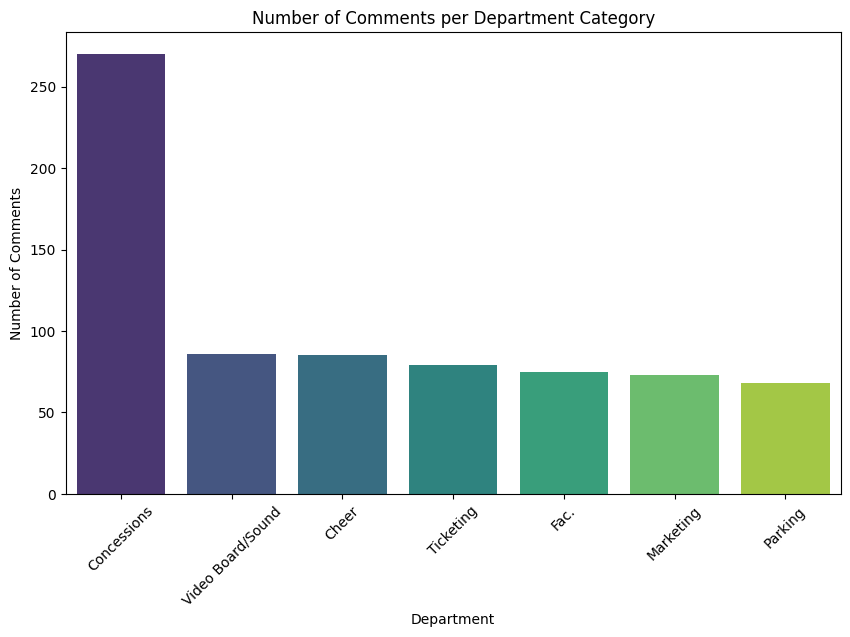

In [63]:
# Block 6: Count the number of reviews per department category
category_counts = df['Category'].value_counts()

# Plot the category counts as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title("Number of Comments per Department Category")
plt.xlabel("Department")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()


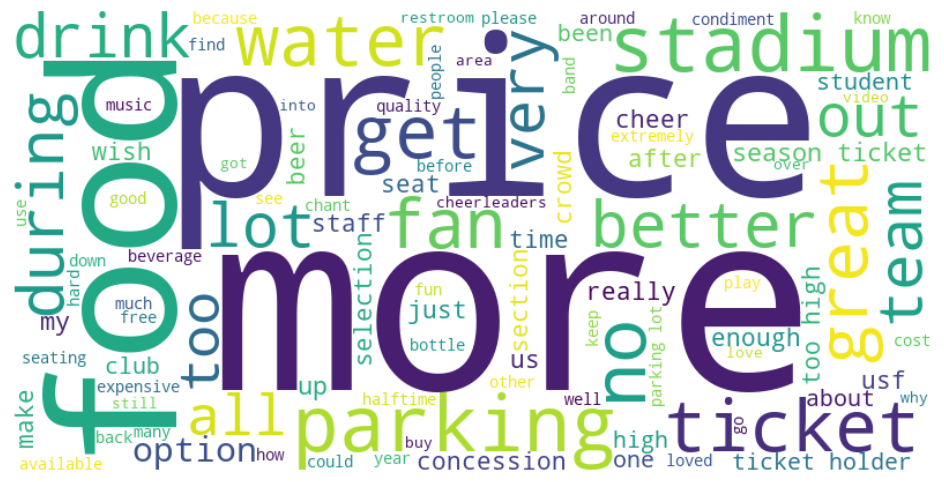

In [65]:
# Block 7: Generate a WordCloud from the cleaned text data
all_text = ' '.join(df['cleaned_reviews'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, stopwords=stop_words, colormap='viridis').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [24]:
# Block 8: Calculate and display average review length
df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
average_review_length = df['review_length'].mean()
print("Average Review Length:", average_review_length)


Average Review Length: 16.222826086956523


In [25]:
# Block 9: Export category counts and common words to CSV files
category_counts.to_csv("category_counts.csv", index=True, header=["Count"])
pd.DataFrame(filtered_word_counts.most_common(20), columns=["Word", "Frequency"]).to_csv("filtered_common_words.csv", index=False)
print("Exported category counts and filtered common words to CSV files.")

Exported category counts and filtered common words to CSV files.
